In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# create a synthetic dataset with a larger imbalance
X,y=make_classification(
    n_samples=100000,
    n_features=20,
    n_informative=2,
    n_redundant=10,
    n_clusters_per_class=1,
    weights=[0.950,0.05],
    flip_y=0,
    random_state=42 # reproducibility
)

In [ ]:
# Split into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
pd.Series(y_train).value_counts()

0    66515
1     3485
Name: count, dtype: int64

In [ ]:
# Train a simple logisti regression model
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

# make predition
y_pred=model.predict(X_test)

# Evaluate the model
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
classification_report_str=classification_report(y_test,y_pred)

In [ ]:
print("Acuracy",accuracy)

Acuracy 0.9879333333333333


In [ ]:
print("Classification Report:\n",classification_report_str)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     28485
           1       1.00      0.76      0.86      1515

    accuracy                           0.99     30000
   macro avg       0.99      0.88      0.93     30000
weighted avg       0.99      0.99      0.99     30000



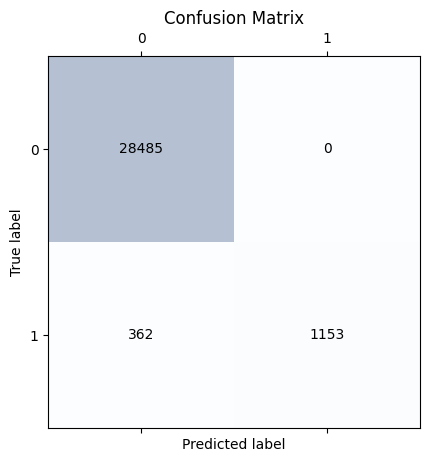

In [ ]:
# Plotting confusion matrix
plt.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        plt.text(x=j, y=i, s=confusion[i, j], ha='center', va='center')

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

## Random UnderSampling

In [15]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from collections import Counter

# Create a synthetic dataset with imbalance
X,y=make_classification(
    n_samples=100000,
    n_features=20,
    weights=[0.95,0.05],
    random_state=42
)

# create a Dataframe with the data
df=pd.DataFrame(X)
df['target']=y

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.328547,-1.384724,-0.284819,-0.030196,-0.840365,-1.012684,-1.297740,-0.046200,0.744777,-1.843827,...,-0.653045,0.944825,0.732865,-0.198004,-0.664024,-0.230734,-0.355199,-1.165488,2.073555,0
1,0.801869,2.390928,-1.232367,1.144513,-1.031983,0.742784,-1.287784,-0.639615,-1.332604,-0.708368,...,-0.969296,-0.338274,0.064910,-0.904066,-0.245746,1.021368,0.074146,1.120685,1.605930,0
2,-0.674526,-0.261000,-0.464924,-1.495308,-1.888075,0.064322,0.541989,-2.489174,1.023665,-2.289584,...,-1.666518,0.521572,-0.487614,-0.020727,0.034012,-1.341455,-0.368306,0.420709,0.096521,0
3,-1.188735,1.100929,0.818446,-0.573651,-0.777052,1.706128,-0.929116,-0.520684,-0.677726,-1.600877,...,-0.615035,0.062205,0.436514,1.303629,1.340363,-1.203694,-0.568942,-0.907041,-0.460908,0
4,-1.227908,-0.617620,-0.104353,0.986159,-0.763533,1.249342,-1.105068,-0.516500,-2.200517,-1.589052,...,-0.602610,-1.186905,-1.399522,-0.721840,0.657838,0.139794,-0.212828,-0.917548,-1.022671,0


In [17]:
df['target'].value_counts()

target
0    94542
1     5458
Name: count, dtype: int64

In [18]:
# Splitthe dataset into majority and minority classes
majority_df=df[df['target']==0]
minority_df=df[df['target']==1]

In [19]:
# Apply random undersampling to the majority class
undersampled_majority_df = majority_df.sample(n=minority_df.shape[0], random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_df = pd.concat([undersampled_majority_df, minority_df])

# Shuffle the resulting DataFrame to avoid any order bias
undersampled_df = shuffle(undersampled_df, random_state=42)


In [20]:
undersampled_df['target'].value_counts()

target
0    5458
1    5458
Name: count, dtype: int64

In [21]:
X=undersampled_df.drop(columns=['target'])
y=undersampled_df['target']

# Split init training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [22]:
# Train a simple logistic regession model
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

# make prediction
y_pred=model.predict(X_test)

# Evalaute the model
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
classification_report_str=classification_report(y_test,y_pred)

In [23]:
# Display unit
print("Accuracy:",accuracy)

Accuracy: 0.8290076335877863


In [24]:
confusion

array([[1358,  262],
       [ 298, 1357]])

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1620
           1       0.84      0.82      0.83      1655

    accuracy                           0.83      3275
   macro avg       0.83      0.83      0.83      3275
weighted avg       0.83      0.83      0.83      3275



## Using imblanced Learn

In [26]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from collections import Counter

# Create a synthetic dataset with imbalance
X, y = make_classification(
    n_samples=100000,
    n_features=20,
    weights=[0.95, 0.05],  # Class imbalance
    random_state=42
)

# Check the original class distribution
print("Original class distribution:", Counter(y))


Original class distribution: Counter({0: 94542, 1: 5458})


In [27]:
# Use RandomUnderSampler to balance the dataset
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the new class distribution after undersampling
print("New class distribution after undersampling:", Counter(y_resampled))

New class distribution after undersampling: Counter({0: 5458, 1: 5458})


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [29]:
# Train a simple logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [30]:
print(classification_report_str)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1648
           1       0.82      0.82      0.82      1627

    accuracy                           0.82      3275
   macro avg       0.82      0.82      0.82      3275
weighted avg       0.82      0.82      0.82      3275



### Oversampling

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.utils import shuffle

# Create the imbalanced dataset
X, y = make_classification(
    n_samples=100000,
    n_features=20,
    weights=[0.95, 0.05],  # Class imbalance
    random_state=42
)

# Convert the data into a DataFrame
df = pd.DataFrame(X)
df['target'] = y

# Check the original class distribution
print("Original class distribution:", Counter(y))



Original class distribution: Counter({0: 94542, 1: 5458})


In [32]:
# Split the data into majority and minority classes
majority_class = df[df['target'] == 0]
minority_class = df[df['target'] == 1]

# Determine the number of samples to add to the minority class
samples_needed = len(majority_class) - len(minority_class)

samples_needed

89084

In [33]:
# Apply random oversampling to the minority class to match the majority class
adjusted_oversampling = minority_class.sample(
    n=samples_needed,
    replace=True,  # Sampling with replacement
    random_state=42
)

# Combine the majority class with the adjusted oversampling
balanced_df = pd.concat([majority_class, adjusted_oversampling])

# Shuffle the resulting DataFrame to avoid order bias
balanced_df = shuffle(balanced_df, random_state=42)

# Check the new class distribution after oversampling
new_class_distribution = Counter(balanced_df['target'])
print("New class distribution after oversampling:", new_class_distribution)

New class distribution after oversampling: Counter({0: 94542, 1: 89084})


In [34]:
X = balanced_df.drop(columns=['target'])
y = balanced_df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
# Train a simple logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [36]:
print(classification_report_str)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     28507
           1       0.83      0.82      0.82     26581

    accuracy                           0.83     55088
   macro avg       0.83      0.83      0.83     55088
weighted avg       0.83      0.83      0.83     55088



### Oversampling using Imbalanced Learn


In [37]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter

# Create an imbalanced dataset
X, y = make_classification(
    n_samples=100000,
    n_features=20,
    weights=[0.95, 0.05],  # Class imbalance
    random_state=42
)

# Check the original class distribution
original_class_distribution = Counter(y)
print("Original class distribution:", original_class_distribution)

# Initialize RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply random oversampling to balance the dataset
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Check the new class distribution after oversampling
new_class_distribution = Counter(y_oversampled)
print("New class distribution after oversampling:", new_class_distribution)


Original class distribution: Counter({0: 94542, 1: 5458})
New class distribution after oversampling: Counter({0: 94542, 1: 94542})


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)

In [39]:
# Train a simple logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(classification_report_str)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84     28347
           1       0.84      0.82      0.83     28379

    accuracy                           0.83     56726
   macro avg       0.83      0.83      0.83     56726
weighted avg       0.83      0.83      0.83     56726



### SMOTE

In [40]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Generate an imbalanced dataset
X, y = make_classification(
    n_samples=100000,
    n_features=20,
    weights=[0.95, 0.05],  # Class imbalance
    random_state=42
)

# Check the original class distribution
original_class_distribution = Counter(y)
print("Original class distribution:", original_class_distribution)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Auto adjusts to balance the dataset
X_smote, y_smote = smote.fit_resample(X, y)

# Check the new class distribution after SMOTE
new_class_distribution = Counter(y_smote)
print("New class distribution after SMOTE:", new_class_distribution)



Original class distribution: Counter({0: 94542, 1: 5458})
New class distribution after SMOTE: Counter({0: 94542, 1: 94542})


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [42]:
# Train a simple logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(classification_report_str)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84     28347
           1       0.85      0.84      0.84     28379

    accuracy                           0.84     56726
   macro avg       0.84      0.84      0.84     56726
weighted avg       0.84      0.84      0.84     56726



### Class Weighting

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Generate the imbalanced dataset
X, y = make_classification(
    n_samples=100000,
    n_features=20,
    weights=[0.95, 0.05],  # Class imbalance
    random_state=42
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define class weights
class_weights = {0: 1, 1: 19}  # Assigning a higher weight to the minority class

# Initialize and train Logistic Regression model with class weighting
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     18886
           1       0.22      0.84      0.35      1114

    accuracy                           0.83     20000
   macro avg       0.61      0.83      0.63     20000
weighted avg       0.95      0.83      0.87     20000



### Balanced Random Forest

In [44]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Generate the imbalanved dataset
X,y=make_classification(
    n_samples=100000,
    n_features=20,
    weights=[0.95,0.05],
    random_state=42
)

# Split the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(
    n_estimators=100, random_state=0, sampling_strategy="all", replacement=True,
    bootstrap=False,
)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

In [47]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     18886
           1       0.31      0.76      0.44      1114

    accuracy                           0.89     20000
   macro avg       0.65      0.83      0.69     20000
weighted avg       0.95      0.89      0.91     20000

